Load V1 receptive fields from Stringer et. al. 2019 and compute covariance matrix

In [1]:
import numpy as np
import glob
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
dataroot = 'data/V1_data_Stringer/'
data = sio.loadmat(dataroot + 'lowrank_fits.mat')
A, B, C, var_explained = data['aAll'][0], data['bAll'][0], data['cAll'][0], data['vtest'][0]

In [196]:
# load images
mt = sio.loadmat(dataroot + 'images_natimg2800_all.mat')
imgs = mt['imgs']  # 68 by 270 by number of images
Lx, Ly, num_images = imgs.shape

In [268]:
# load receptive fields for particular mouse
m = 4 # mouse # from 0-6
vtest = var_explained[m][0]
# vtest[np.isnan(vtest)] = 0

a, b, c = A[m], B[m], C[m]
t = a @ b.T
all_RF = c @ t

# find rf which have the most variance explained
RF = all_RF[vtest > sorted(vtest)[-5]]
norm_RF = (RF - np.mean(RF, axis=1).reshape(-1, 1)) / np.std(RF, axis=1).reshape(-1, 1)
norm_RF = norm_RF[:]

<ipython-input-268-42c97b203e31>:11: RuntimeWarning: invalid value encountered in greater
  RF = all_RF[vtest > sorted(vtest)[-5]]


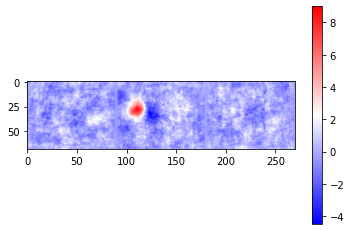

In [289]:
i = 0
fig = plt.figure()
plt.imshow(norm_RF[i].reshape(Ly, Lx).T, cmap='bwr')
plt.colorbar()

In [260]:
C_data = norm_RF.T @ norm_RF

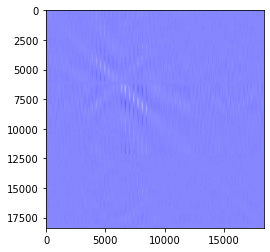

In [290]:
fig = plt.figure()
plt.imshow(C_data, cmap='bwr')

In [267]:
sorted(vtest)

[-0.012625217,
 -0.010494351,
 -0.009432912,
 -0.00905025,
 -0.008434892,
 -0.0071754456,
 -0.0066912174,
 -0.0058805943,
 -0.005597949,
 -0.005245447,
 -0.0049723387,
 -0.004867196,
 -0.0048083067,
 -0.004786253,
 -0.00464499,
 -0.004626751,
 -0.004580021,
 -0.0045568943,
 -0.0044595003,
 -0.0044265985,
 -0.0044163465,
 -0.00435555,
 -0.0043236017,
 -0.0042880774,
 -0.0041913986,
 -0.0041726828,
 -0.004102111,
 -0.004086852,
 -0.0040644407,
 -0.0039162636,
 -0.0038696527,
 -0.0038685799,
 -0.0038228035,
 -0.0037887096,
 -0.003757596,
 -0.0036839247,
 -0.003679037,
 -0.0036484003,
 -0.0034923553,
 -0.0034776926,
 -0.0033859015,
 -0.0032349825,
 -0.003211856,
 -0.0031405687,
 -0.00306952,
 -0.0030584335,
 -0.0029435158,
 -0.0028201342,
 -0.002786994,
 -0.002772808,
 -0.002770543,
 -0.002759099,
 -0.002699256,
 -0.0026625395,
 -0.0026262999,
 -0.0026077032,
 -0.0025763512,
 -0.0024769306,
 -0.0024738312,
 -0.002394557,
 -0.0023790598,
 -0.0023647547,
 -0.0023618937,
 -0.0023270845,
 -0.0